In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def epsilon_greedy(epsilon, Qt_a):
    assert 0 <= epsilon <= 1
    if epsilon == 0:
        EXPLORE = False
    else:     
        EXPLORE = np.random.rand() < epsilon
    
    if EXPLORE:
        n_actions = len(Qt_a)
        action = np.random.choice(n_actions, 1)[0]
    else:
        action = np.argmax(Qt_a)

    return action

In [3]:
def action_reward(action):
    global mean_rewards_each_arm, SIGMA
    mu, sigma = mean_rewards_each_arm[action], SIGMA
    reward = mu + sigma * np.random.randn()
    return reward

In [4]:
def update_reward_history(action, reward):
    global reward_history, Qt_a
    reward_history[action] = np.append(reward_history[action], reward)
    Qt_a[action] = reward_history[action].mean()

In [5]:
def is_optial_action(action):
    global mean_rewards_each_arm
    optimal_action = np.argmax(mean_rewards_each_arm)
    if optimal_action == action:
        return 1
    else:
        return 0

In [6]:
np.random.seed(0)
K_ARMS = 10
N_RUNS = 200     # 2000
N_STEPS = 1000
SIGMA = 1
mean_rewards_each_arm = 3*(np.random.rand(K_ARMS)-0.5)

In [7]:
# plotting the distribution of rewards for each action
N_POINTS = 1000
reward_dist = np.empty([N_POINTS, 0])
for k in np.arange(K_ARMS):
    mu_k = mean_rewards_each_arm[k]
    s = np.random.normal(mu_k, SIGMA, N_POINTS).reshape(-1, 1)
    reward_dist = np.concatenate((reward_dist, s), axis=1)

Text(0.5, 1.0, 'reward distribution')

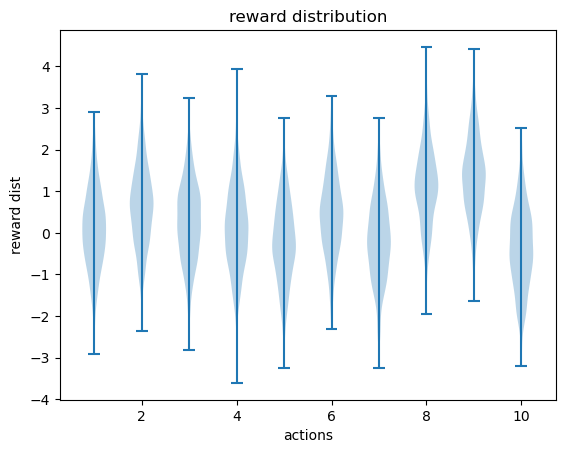

In [8]:
fig, ax = plt.subplots()
ax.violinplot(reward_dist, vert=True)
plt.xlabel('actions')
plt.ylabel('reward dist')
plt.title('reward distribution')

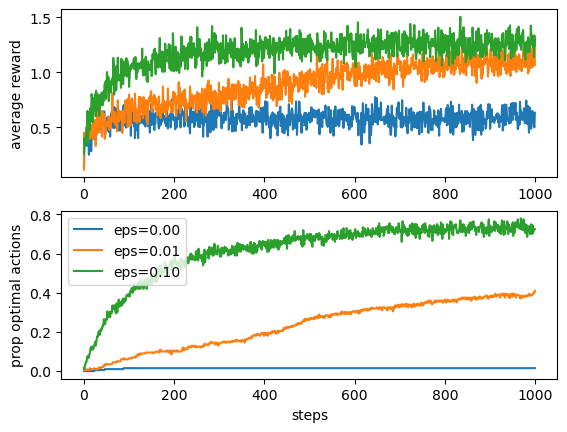

In [9]:
# plotting average reward at each time step
epsilons = [0, 0.01, 0.1]
n_epsilons = len(epsilons)
reward_stepwise_each_epsilon = dict()
optimal_actions_each_epsilon = dict()

fig, (ax1, ax2) = plt.subplots(2, 1)
for epsI in np.arange(n_epsilons):
    EPSILON = epsilons[epsI]
    reward_each_step_all_runs = np.empty((0, N_STEPS))
    is_optimal_action_each_step_all_runs = np.empty((0, N_STEPS))
    for run in np.arange(N_RUNS):
        Qt_a = np.zeros(K_ARMS)    # the expected reward for each action
        reward_history = dict()
        for k in np.arange(K_ARMS):
            reward_history[k] = np.empty((0, 1))

        reward_each_step_this_run = np.empty((0, 1))
        is_optimal_actions_this_run = np.empty((0, 1))

        for step in np.arange(N_STEPS):
            action = epsilon_greedy(EPSILON, Qt_a)
            reward = action_reward(action)
            update_reward_history(action, reward)
            reward_each_step_this_run = np.append(reward_each_step_this_run, reward)
            is_optimal_actions_this_run = np.append(is_optimal_actions_this_run, is_optial_action(action))

        reward_each_step_all_runs = np.concatenate((reward_each_step_all_runs, reward_each_step_this_run.reshape(1, -1)), axis=0)
        is_optimal_action_each_step_all_runs = np.concatenate((is_optimal_action_each_step_all_runs, is_optimal_actions_this_run.reshape(1, -1)), axis=0)

    reward_stepwise_each_epsilon[epsI] = reward_each_step_all_runs.mean(axis=0)
    ax1.plot(reward_stepwise_each_epsilon[epsI], label=('eps=%.2f' % EPSILON))
    optimal_actions_each_epsilon[epsI] = is_optimal_action_each_step_all_runs.mean(axis=0)
    ax2.plot(optimal_actions_each_epsilon[epsI], label=('eps=%.2f' % EPSILON))

plt.xlabel('steps')
ax1.set_ylabel('average reward')

ax2.set_ylabel('prop optimal actions')
ax2.legend()

plt.show()